## CS:GO Winner Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler    #Deals well with outliers
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('D:/DATASETS/CS_GO_Dataset/csgo_round_snapshots.csv')

In [3]:
data.head(10)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,114.97,1.0,0.0,de_dust2,False,500.0,500.0,500.0,0.0,1750.0,...,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,CT
6,94.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
7,74.97,1.0,0.0,de_dust2,False,295.0,111.0,296.0,0.0,1700.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
8,54.97,1.0,0.0,de_dust2,False,249.0,89.0,269.0,0.0,2300.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
9,174.97,2.0,0.0,de_dust2,False,500.0,500.0,196.0,0.0,19800.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

### Data Preparation

In [5]:
data.isnull()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122407,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
122408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
np.sum(np.sum(data.isnull()))         # Counts the total no.of missing values in a dataframe!

0

In [7]:
data.select_dtypes(np.number)    # That means there are 3 columns with alphabets!

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,500.0,500.0,400.0,300.0,600.0,650.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,391.0,400.0,294.0,200.0,750.0,500.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [8]:
data.drop(data.select_dtypes(np.number),axis=1)       #Helps is finding out the columns with a alphabets

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


**We will convert columns (map,bomb_planted,round_winner) into numerical type data for the machine to understand**

In [9]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

In [10]:
encoder=LabelEncoder()

data['map']=encoder.fit_transform(data['map'])
map_mappings={index:label for index,label in enumerate(encoder.classes_)}
map_mappings

{0: 'de_cache',
 1: 'de_dust2',
 2: 'de_inferno',
 3: 'de_mirage',
 4: 'de_nuke',
 5: 'de_overpass',
 6: 'de_train',
 7: 'de_vertigo'}

In [11]:
data['round_winner']=encoder.fit_transform(data['round_winner'])
round_winner_mappings={index:label for index,label in enumerate(encoder.classes_)}
round_winner_mappings

{0: 'CT', 1: 'T'}

In [12]:
data.loc[data.duplicated()]

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
191,170.0,7.0,8.0,3,0,500.0,500.0,200.0,200.0,2000.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
384,170.0,11.0,4.0,1,0,500.0,500.0,200.0,300.0,1900.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
385,170.0,11.0,4.0,1,0,500.0,500.0,200.0,300.0,1900.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
737,175.0,8.0,7.0,2,0,500.0,500.0,100.0,300.0,3350.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
738,175.0,8.0,7.0,2,0,500.0,500.0,100.0,300.0,3350.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122044,175.0,0.0,0.0,6,0,500.0,500.0,400.0,200.0,1350.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122140,175.0,7.0,8.0,6,0,500.0,500.0,300.0,300.0,950.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
122229,175.0,0.0,0.0,6,0,300.0,400.0,0.0,0.0,2400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
122328,175.0,7.0,8.0,6,0,500.0,500.0,300.0,0.0,2050.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
data = data.loc[~data.duplicated()].reset_index(drop=True).copy()    #removing the duplicate values!

In [14]:
data

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117443,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
117444,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
117445,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
117446,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


### Exploratory Data Analysis(EDA)

In [15]:
data['map'].value_counts()

2    22982
1    21252
4    18078
3    17793
5    13474
6    12919
7    10805
0      145
Name: map, dtype: int64

2: 19.57%
1: 18.09%
4: 15.39%
3: 15.15%
5: 11.47%
6: 11.00%
7: 9.20%
0: 0.12%


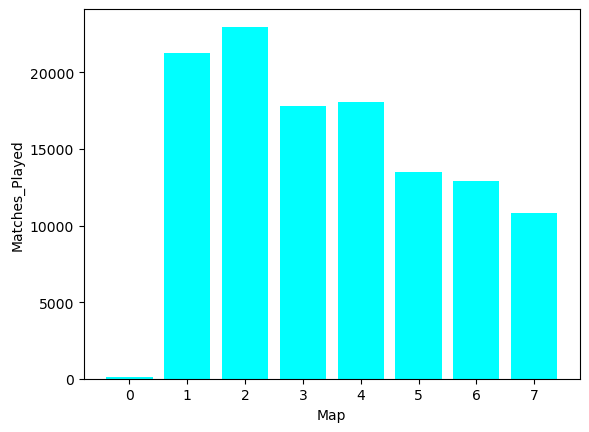

In [16]:
counts = data['map'].value_counts()
total = counts.sum()
percentages = counts / total * 100

zipped_list=zip(counts.index, percentages.values)
for map_name, percent in zipped_list:
    print(f'{map_name}: {percent:.2f}%')

plt.bar(counts.index, counts.values, color='cyan')

plt.xlabel('Map')
plt.ylabel('Matches_Played')
plt.show()

From the bar chart we can see that professional players prefer to play **de_inferno** with **19.57%** of rounds played, followed by **de_dust2** with a play percentage of **18.09%**, **de_nuke** with **15.39%**. **de_cache** was least played, with a **0.12%** round percentage played.

Percentage of CT round winners on de_inferno: 45.56%
Percentage of T round winners on de_inferno: 54.44%


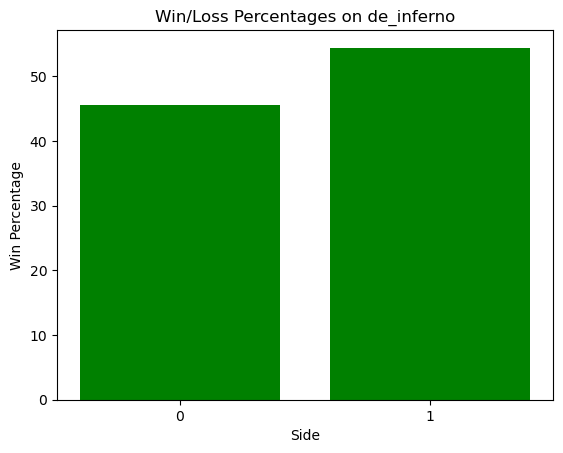

In [17]:
inferno_matches = data[data['map'] == 2]

total_rounds = len(inferno_matches)

round_winner_counts = inferno_matches.groupby('round_winner').size()


ct_percentage = round_winner_counts[0] / total_rounds * 100
t_percentage = round_winner_counts[1] / total_rounds * 100

print(f"Percentage of CT round winners on de_inferno: {ct_percentage:.2f}%")
print(f"Percentage of T round winners on de_inferno: {t_percentage:.2f}%")

plt.bar(['0', '1'], [ct_percentage, t_percentage],color='green')
plt.title('Win/Loss Percentages on de_inferno')
plt.xlabel('Side')
plt.ylabel('Win Percentage')
plt.show()

Looks like the gamers are **winning more rounds as T than as CT!** This might give us insights on which team to start on when entering into a match to choose T side first in order to get an advantage.

In [18]:
t_wins = data[data['round_winner'] == 1]
t_wins

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
10,114.97,2.0,0.0,1,0,500.0,500.0,496.0,500.0,2200.0,...,5.0,4.0,5.0,2.0,0.0,0.0,1.0,0.0,1.0,1
11,94.97,2.0,0.0,1,0,500.0,500.0,496.0,500.0,2200.0,...,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1
12,74.97,2.0,0.0,1,0,300.0,200.0,296.0,200.0,1200.0,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
13,54.97,2.0,0.0,1,0,116.0,126.0,187.0,179.0,1050.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
14,34.97,2.0,0.0,1,0,100.0,105.0,100.0,174.0,300.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117443,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
117444,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
117445,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
117446,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [19]:
t_wins_with_bomb_planted = t_wins[t_wins['bomb_planted'] == 1]

t_wins_with_bomb_planted_on_inferno = t_wins_with_bomb_planted[t_wins_with_bomb_planted['map'] == 2]
percentage_t_wins = len(t_wins_with_bomb_planted_on_inferno) / len(t_wins[t_wins['map'] == 2]) * 100

print(f"The percentage of T wins with the bomb planted on de_inferno is {percentage_t_wins:.2f}%")

The percentage of T wins with the bomb planted on de_inferno is 19.93%


This tells us that most of the T wins are resulting from either time running out, or by eliminating all 5 CT opponents (because they are the only other ways to win at this game!).

In [20]:
rounds_won_per_winner= data.groupby(['map', 'round_winner'])['round_winner'].count().unstack()
rounds_won_per_winner

round_winner,0,1
map,,
0,103,42
1,9649,11603
2,10471,12511
3,8736,9057
4,9710,8368
5,6760,6714
6,7007,5912
7,5071,5734


In [21]:
total_rounds_per_map= data.groupby('map')['map'].count().values.reshape(-1,1)   # we reshape the array into a column vector!
total_rounds_per_map

array([[  145],
       [21252],
       [22982],
       [17793],
       [18078],
       [13474],
       [12919],
       [10805]], dtype=int64)

In [22]:
map_win_pct = rounds_won_per_winner*100/total_rounds_per_map
map_win_pct

round_winner,0,1
map,,
0,71.034483,28.965517
1,45.402786,54.597214
2,45.561744,54.438256
3,49.097960,50.902040
4,53.711694,46.288306
5,50.170699,49.829301
6,54.237944,45.762056
7,46.931976,53.068024


In [23]:
ct_win_pct = map_win_pct[0]
ct_win_pct

map
0    71.034483
1    45.402786
2    45.561744
3    49.097960
4    53.711694
5    50.170699
6    54.237944
7    46.931976
Name: 0, dtype: float64

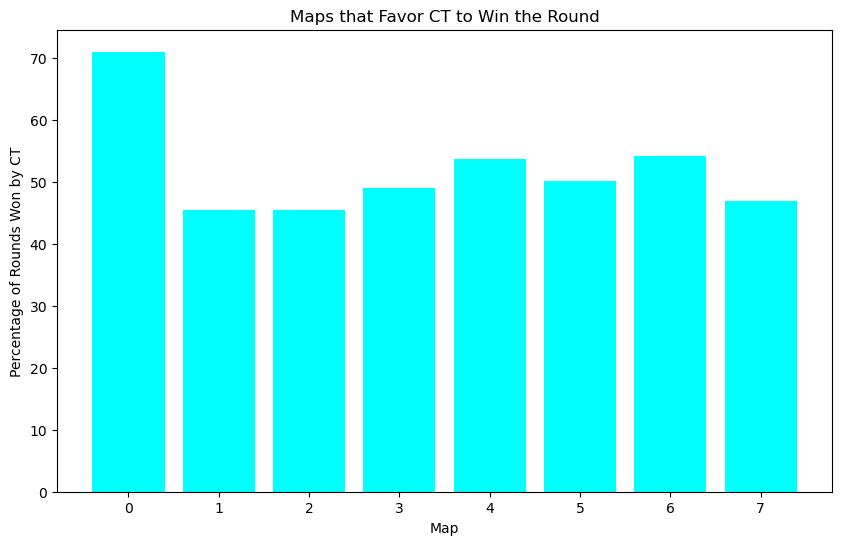

In [24]:
plt.figure(figsize=(10,6))
plt.bar(ct_win_pct.index, ct_win_pct, color='cyan')

plt.xlabel('Map')
plt.ylabel('Percentage of Rounds Won by CT')
plt.title('Maps that Favor CT to Win the Round')

plt.show()

Taking a look at the above chart, we can see that most maps have equal round win odds for CT vs T. de_train and de_nuke have better CT odds, because these maps have harder entrances into the bomb sites! it's hard to comment on de_cache as it has a very small sample size!

In [25]:
t_win_pct = map_win_pct[1]
t_win_pct

map
0    28.965517
1    54.597214
2    54.438256
3    50.902040
4    46.288306
5    49.829301
6    45.762056
7    53.068024
Name: 1, dtype: float64

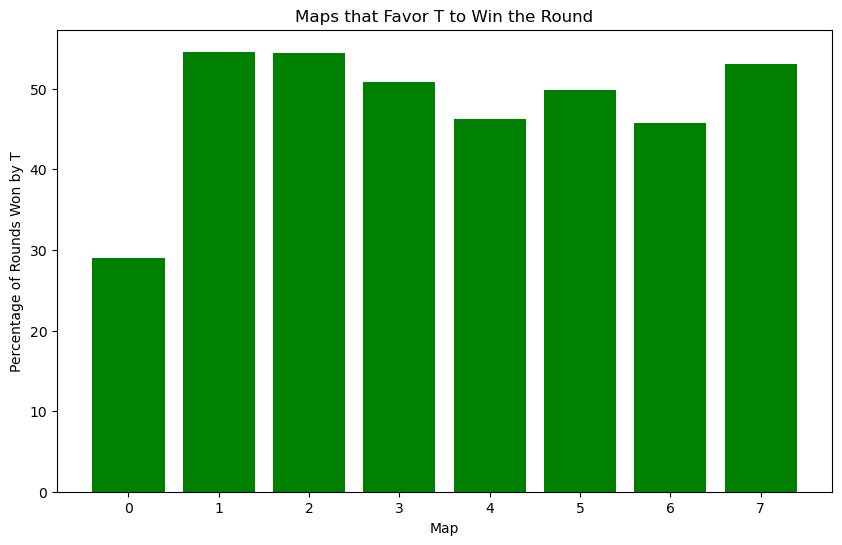

In [26]:
plt.figure(figsize=(10,6))
plt.bar(t_win_pct.index, t_win_pct, color='green')

plt.xlabel('Map')
plt.ylabel('Percentage of Rounds Won by T')
plt.title('Maps that Favor T to Win the Round')

plt.show()

de_dust2, de_inferno and de_vertigo have better T odds. It's hard to comment on de_cache as it has a very small sample size!

We can answer some pertinent questions now!

**1)What maps are popularly played in the professional scene?**
>It looks that de_inferno, de_dust2 and de_nuke are favored maps in the professional scene. These maps require a lot of team work, which these professionals spend a lot of time learning towards.

**2)What maps have a round favor toward CT vs T side?**
>We can see that de_cache, de_train and de_nuke have the most favorable round win odds on CT side.


### Principal Component Analysis(PCA)

In [27]:
y=data['round_winner']
x=data.drop('round_winner',axis=1)           # Splitting our data into independent and dependent variables

In [28]:
x.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
scaler=RobustScaler()
x=scaler.fit_transform(x)       #scaling our dataset
x= pd.DataFrame(x)  
x

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,1.334055,-0.857143,-0.750,-0.666667,0.0,0.000000,0.000000,-1.308219,-1.208904,-0.138686,...,-0.666667,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,0.0,0.0
1,1.018152,-0.857143,-0.750,-0.666667,0.0,0.000000,0.000000,0.061644,-0.181507,-0.386861,...,-0.666667,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.333333,0.0,0.0
2,0.018984,-0.857143,-0.750,-0.666667,0.0,-0.664634,-0.523560,-0.301370,-0.523973,-0.375912,...,-0.666667,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.333333,0.0,0.0
3,-0.314072,-0.857143,-0.750,-0.666667,0.0,-0.664634,-0.523560,-0.301370,-0.523973,-0.375912,...,-0.666667,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,0.0,0.0
4,1.333555,-0.714286,-0.750,-0.666667,0.0,0.000000,0.000000,-0.650685,-1.208904,0.908759,...,-0.666667,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117443,-1.323564,0.714286,1.000,1.000000,1.0,-1.829268,-1.350785,-0.640411,0.020548,-0.423358,...,-0.333333,0.333333,0.000000,0.000000,0.0,0.0,0.0,-0.333333,0.0,0.0
117444,1.332889,0.714286,1.125,1.000000,0.0,0.000000,0.000000,-0.982877,-0.609589,0.408759,...,-0.333333,0.333333,0.000000,-0.333333,0.0,0.0,0.0,-0.333333,0.0,0.0
117445,0.333722,0.714286,1.125,1.000000,0.0,0.000000,0.000000,0.386986,0.417808,-0.343066,...,0.666667,1.000000,0.666667,1.333333,0.5,0.0,0.0,1.333333,0.0,0.0
117446,0.000666,0.714286,1.125,1.000000,0.0,0.000000,0.000000,0.386986,0.417808,-0.343066,...,-0.333333,1.333333,-0.333333,0.666667,0.0,0.0,0.0,1.000000,0.0,0.0


In [30]:
pca= PCA(n_components=96)
pca.fit(x)

PCA(n_components=96)

In [31]:
pca.explained_variance_ratio_

array([2.43667382e-01, 1.21479484e-01, 9.53922327e-02, 5.15586152e-02,
       4.38747450e-02, 4.00955932e-02, 3.61203892e-02, 3.47247890e-02,
       2.82871255e-02, 2.28326313e-02, 2.05331438e-02, 1.79676472e-02,
       1.55165510e-02, 1.48755955e-02, 1.45656231e-02, 1.32461038e-02,
       1.23628071e-02, 1.19952395e-02, 1.12511144e-02, 1.07236920e-02,
       1.01129212e-02, 9.07129191e-03, 8.57313036e-03, 8.31972838e-03,
       7.92306094e-03, 6.90501366e-03, 6.42354125e-03, 6.03303032e-03,
       5.95363752e-03, 5.76804375e-03, 5.01400052e-03, 4.56089813e-03,
       4.03112778e-03, 3.58262268e-03, 3.38069645e-03, 2.92628515e-03,
       2.85930695e-03, 2.77323591e-03, 2.70478683e-03, 2.62330244e-03,
       2.46225397e-03, 2.42233987e-03, 2.27347888e-03, 2.24877214e-03,
       2.18374044e-03, 1.97231654e-03, 1.75807174e-03, 1.34182761e-03,
       1.25786434e-03, 1.15771711e-03, 1.14279585e-03, 1.06598841e-03,
       9.55960421e-04, 9.29544736e-04, 7.75461740e-04, 5.60781015e-04,
      

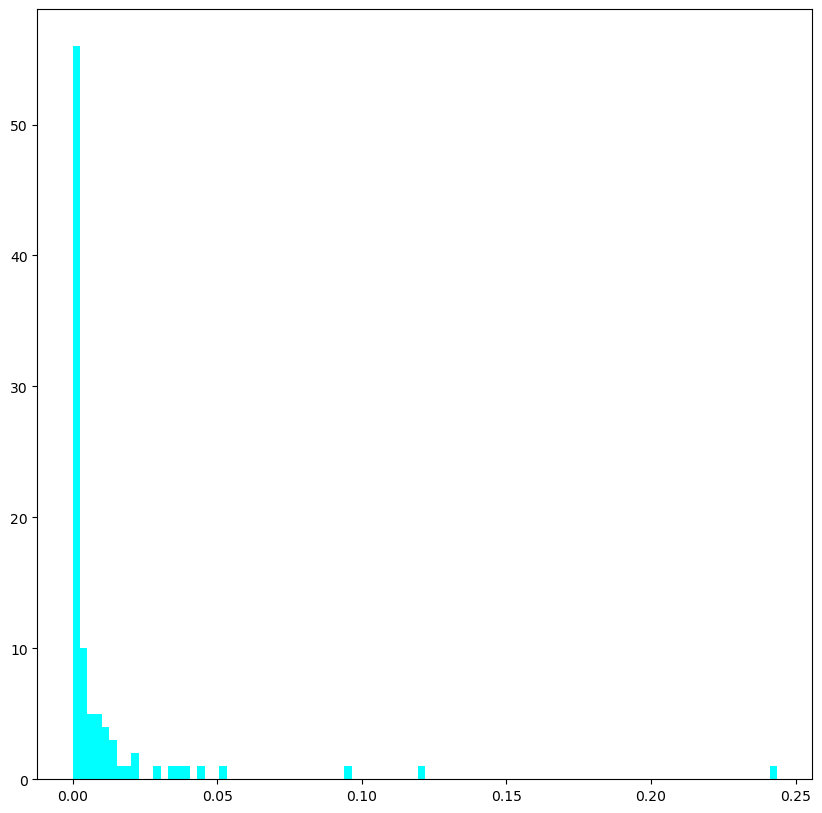

In [32]:
plt.figure(figsize=(10,10))
plt.hist(pca.explained_variance_ratio_, bins=96, color='cyan')
plt.show()

In [33]:
# We want to find the PCA's that explain our data to a large extent and capture it's variance. We'll drop the rest.

def getKcomponents(pca, alpha):
    total_variance = 0
    
    for feature, variance in enumerate(pca.explained_variance_ratio_):
        total_variance += variance
        if (total_variance >= 1 - alpha):
            return feature + 1
    return len(pca.explained_variance_ratio_)

In [34]:
k=getKcomponents(pca, 0.05)
k

34

That means that the first **34 PCA's explain 95% variance in the original data**. We'll work with this now, hence reducing the no. of features in our dataset.

In [35]:
x=pca.transform(x)[: , 0:k]
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.398117,3.238997,-0.643806,-0.557161,-0.929975,0.197586,-0.711034,-1.003372,0.219958,-0.193970,...,-0.266389,0.052886,-0.094844,-0.031964,-0.076730,-0.036172,-0.019391,0.035275,-0.090214,-0.014612
1,0.079311,2.577035,-0.352495,-0.964470,-1.034496,0.456814,-1.006955,-0.650545,-0.305599,-0.123050,...,-0.100995,0.058579,0.027485,-0.001536,0.096080,-0.035706,0.030096,-0.193333,0.111080,0.241827
2,1.633648,1.525247,-0.368927,-0.851983,-0.872305,0.289268,-0.870204,-0.651674,-0.089315,-0.317420,...,0.073943,-0.036013,0.132445,-0.048925,0.096651,0.120210,-0.071625,-0.426855,0.044876,0.209454
3,1.844261,1.454458,-0.505559,-0.849190,-0.949650,0.401819,-0.754743,-0.571071,-0.200155,-0.320648,...,0.045744,0.047126,0.036776,-0.047588,-0.039165,0.169999,-0.153304,-0.415133,0.029376,0.169236
4,0.122267,3.260495,-0.922443,-0.044634,-0.440191,0.130199,-0.524223,-0.821525,0.192235,-0.558234,...,-0.214312,-0.010719,-0.010588,0.049068,0.083092,-0.017108,0.032697,-0.230937,-0.005441,0.078217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117443,2.789924,-1.157758,1.667625,0.775136,-0.619039,-0.556970,0.718120,-0.294930,-0.837368,1.115556,...,0.117039,-0.155207,-0.311508,-0.445034,-0.097419,0.006618,0.376044,0.072308,-0.128493,-0.191718
117444,-0.460505,2.489192,0.144581,1.244636,-0.429082,-0.703860,-0.012038,0.148964,0.052536,0.989269,...,0.735487,0.030506,-0.175400,-0.091828,-0.155931,0.121334,0.361424,0.312881,0.033604,0.111321
117445,-2.123265,-0.829501,1.020905,-0.934451,1.413530,1.184952,0.548722,0.159632,0.031406,1.803358,...,0.558012,-0.048359,-0.064085,0.103686,0.236784,-0.220016,0.414840,-0.275217,-0.246811,-0.006271
117446,-1.661261,-0.582591,1.696458,-0.307030,1.195846,1.636047,0.544795,0.033320,-0.100109,1.905972,...,0.385034,-0.023557,-0.062370,0.005932,0.207657,-0.285242,0.418266,-0.250138,-0.142073,0.320713


In [36]:
# Splitting the dataset into training and testing samples!

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [37]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
114596,0.399993,2.270233,-0.363692,-0.589160,-0.815520,0.138638,-0.725082,-0.066400,-0.791313,0.919295,...,-0.076631,0.071860,-0.103977,-0.065681,-0.082802,0.246832,-0.231201,-0.505911,-0.034739,-0.101173
49586,1.582006,-1.734310,0.369659,1.342006,0.808252,0.692091,-0.381191,-0.564498,0.312103,-0.726250,...,0.552603,-0.042022,-0.146067,0.204043,0.202529,-0.445725,0.303801,0.394111,-0.002718,0.238172
69473,-0.944876,0.848983,1.621070,-1.963202,2.063496,1.233225,-0.590814,0.238341,-0.434270,0.919506,...,0.736001,-0.182697,0.498130,-0.015134,-0.344840,-0.172528,-0.224311,-0.031851,-0.006498,0.255311
56065,-1.258273,0.093186,-0.004229,2.319794,1.536256,-1.266486,0.068353,2.239538,-0.822673,-1.043716,...,0.630340,-0.135574,0.217868,-0.079013,0.383770,0.273273,0.111713,-0.792427,-0.104031,0.054152
19312,-0.497269,2.728228,-1.308931,1.511858,0.387311,-1.194040,0.143132,0.516737,-0.197703,0.297382,...,-0.227107,-0.013062,0.048375,-0.038945,-0.060551,0.255436,-0.115871,-0.276976,-0.061083,-0.019356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,-3.386885,-2.307746,1.062602,-0.991298,-1.536496,-0.025396,0.748005,0.285957,1.500817,-0.807948,...,0.203158,0.769703,-0.125910,0.034939,-0.204914,-0.063307,0.437627,-0.071341,0.001774,-0.075173
110268,1.964260,-0.135711,-1.980058,-0.821788,-1.832440,1.117015,-0.719015,1.165676,1.006279,-0.259913,...,0.104743,-0.040952,0.165694,0.310651,0.238730,-0.169699,-0.028377,-0.023083,-0.016311,-0.127456
103694,6.555586,-1.865050,-0.979524,0.337828,0.079133,-0.677558,-0.303883,0.067808,1.042295,0.406722,...,-0.089294,-0.011468,0.132029,0.029451,0.209541,-0.078119,-0.334582,-0.149906,-0.044741,-0.009131
860,5.782871,-1.810154,-0.064721,0.543019,-0.321927,-0.236678,-0.252577,-0.861530,0.718529,-0.229260,...,-0.083870,-0.009034,0.165557,0.022519,0.255126,-0.077761,0.038082,-0.061828,-0.011589,0.080922


### Model Selection

In [38]:
log_model=LogisticRegression()
knn_model=KNeighborsClassifier()
forest_model=RandomForestClassifier()
svm_model=SVC()

In [39]:
names=['Logistic_Regression','K_Nearest_Neigbours','Random_Forest','Support_Vector_Machine']
models=[log_model,knn_model,forest_model,svm_model]

In [40]:
def model_performance(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 score for the given model is {f1:.2%}")
    print('Classification report:\n')
    print(classification_report(y_test, y_pred))

In [41]:
model_performance(log_model,x_train, y_train, x_test, y_test)

F1 score for the given model is 76.04%
Classification report:

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     11488
           1       0.77      0.75      0.76     12002

    accuracy                           0.76     23490
   macro avg       0.76      0.76      0.76     23490
weighted avg       0.76      0.76      0.76     23490



In [42]:
model_performance(forest_model,x_train, y_train, x_test, y_test)

F1 score for the given model is 83.33%
Classification report:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     11488
           1       0.85      0.82      0.83     12002

    accuracy                           0.83     23490
   macro avg       0.83      0.83      0.83     23490
weighted avg       0.83      0.83      0.83     23490



In [43]:
model_performance(svm_model,x_train, y_train, x_test, y_test)

F1 score for the given model is 77.97%
Classification report:

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     11488
           1       0.82      0.75      0.78     12002

    accuracy                           0.78     23490
   macro avg       0.79      0.79      0.78     23490
weighted avg       0.79      0.78      0.78     23490



In [44]:
x_train = np.array(x_train)
x_test = np.array(x_test)
knn_model.fit(x_train,y_train)
ypred_knn=knn_model.predict(x_test)
f1 = f1_score(y_test, ypred_knn)
print(f"F1 score for the given model is {f1:.2%}")
print(classification_report(y_test, ypred_knn))

F1 score for the given model is 81.33%
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     11488
           1       0.82      0.81      0.81     12002

    accuracy                           0.81     23490
   macro avg       0.81      0.81      0.81     23490
weighted avg       0.81      0.81      0.81     23490



Hence from the above f1 scores and classification report we can conclude that **Random Forest Classifier** is the best model for our dataset.

Now, we'll do **hyperparameter tuning** on Random Forest Classifier to get the best parameters and best predictions.

In [45]:
# parameters={"n_estimators":[100,150,200,250,300],
#            "max_features":[4,5,6,7,8]}

# forest_model_hpt=GridSearchCV(forest_model,parameters,scoring='roc_auc',cv=5)
# forest_model_hpt.fit(x_train,y_train)
# y_pred_hpt= forest_model_hpt.predict(x_test)
# f1_score(y_test, y_pred_hpt)

We can hypertune our forest model with GridSearchCV. We use the above code to do so. But here, it will take a **really long time to hypertune the model!** So one can run the code if he/she has a really fast computer. 

In [46]:
forest_model.fit(x_train, y_train)
y_pred_forest = forest_model.predict(x_test)

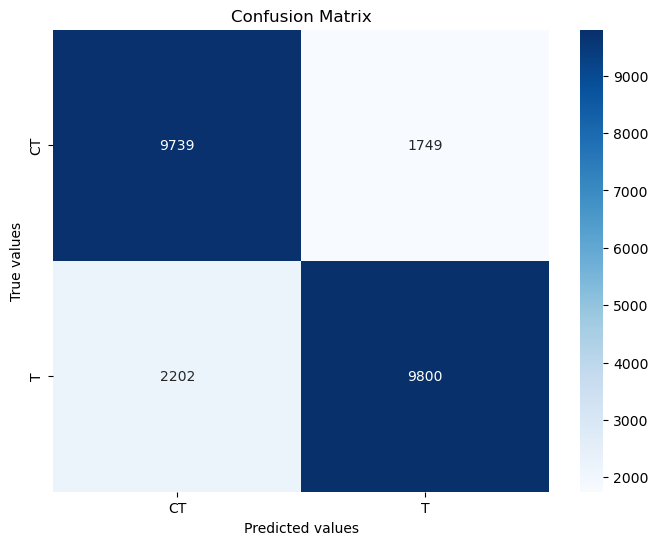

In [62]:
# creating a confusion matrix
plt.figure(figsize=(8, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_forest), 
            annot=True, cmap='Blues',fmt='d', 
            xticklabels=['CT','T'], yticklabels=['CT','T'])

plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix')
plt.show()

The calculated accuracy of the model from the confusion matrix is **83.18%!**